In [2]:
import datetime
import time
import xlrd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


'''# 字符类型的时间
tss1 = '2010/04/09 04:44:11'
'''

#converters强制每个标签的数值类型
sheet = pd.read_excel('flare_euv.xlsx',converters={'DATE':str,'START':str,'PEAKT':str,'ENDT':str,'CLASS':str,'SIGN':int,'CLASS_N':float,'SUB':float,'STARTF':float,'ENDF':float,'CON':float,'T_D':int,'SIGN_2':int,'YEAR':int})
sheet1 = pd.read_excel('flare_x_new.xlsx',converters={'DATE':str,'START':str,'PEAKT':str,'ENDT':str})
#print(type(sheet1['PEAKT'][0]))
#print(type(sheet['PEAKT'][0]))
sheet1.head()

i=0
j=0

while(sheet['N'][i]!=0):
    
    #split切片，将原日期末尾000000去掉
    euv_start=sheet['DATE'][i].split(' ')[0]+' '+sheet['START'][i]  #将日期和时间整理拼接成字符串
    euv_peakt=sheet['DATE'][i].split(' ')[0]+' '+sheet['PEAKT'][i]
    euv_endt=sheet['DATE'][i].split(' ')[0]+' '+sheet['ENDT'][i]
    #print(type(sheet1['DATE'][j]))
    #print(j)
    #print(i)
    x_peakt=sheet1['DATE'][j].split(' ')[0]+' '+sheet1['PEAKT'][j]
#print(euv_start)
    timeArray1 = time.strptime(euv_start, "%Y-%m-%d %H:%M:%S")
    timeStamp1 = int(time.mktime(timeArray1))

    timeArray2 = time.strptime(euv_peakt, "%Y-%m-%d %H:%M:%S")
    timeStamp2 = int(time.mktime(timeArray2))

    timeArray3 = time.strptime(euv_endt, "%Y-%m-%d %H:%M:%S")
    timeStamp3 = int(time.mktime(timeArray3))


    timeArray4 = time.strptime(x_peakt, "%d-%m-%Y %H:%M:%S")  #将日期转化为TAI，秒数格式，唯一识别
    timeStamp4 = int(time.mktime(timeArray4))

    if(timeStamp4>timeStamp1) and (timeStamp4<timeStamp3): #比较x的峰值时间是否在ly耀斑的起始和结束时间段内
        #sheet['CLASS'][i]=sheet1['CLASS'][j]
        sheet.loc[i,('CLASS')]=sheet1['CLASS'][j]
        sheet1.loc[j,('SIGN_1')]=1
        t_d=timeStamp2-timeStamp4
        sheet.loc[i,('T_D')]=t_d
        if(t_d>10): #筛选峰值差大的
            sheet.loc[i,('SIGN_2')]=1
        elif(t_d<-10):
            sheet.loc[i,('SIGN_2')]=2
        elif (t_d>=-10) and (t_d<=10): #筛选峰值差小
            sheet.loc[i,('SIGN_2')]=3
            
        i=i+1
        j=j+1
    elif timeStamp4<timeStamp1:
        j=j+1
    else:
        i=i+1


k=0
while(sheet['N'][k]!=0):
    if(sheet['CLASS'][k][0]=='M') or (sheet['CLASS'][k][0]=='X') or (sheet['CLASS'][k][0]=='0'):
        sheet.loc[k,('SIGN')]=1  #将M和X级耀斑做标记，后期去掉
        k=k+1
        #print(k)
    elif sheet['CLASS'][k][0]=='B':#取得耀斑级别对应峰值流量
        num=float(sheet['CLASS'][k][1:]) #截取字符串
        #rate=sheet['SIGNIF(%)'][k]/num#rate率越大，Ly与x差异越大
        num=round(num*(10)**(-7),10)
        sheet.loc[k,('CLASS_N')]=num
        #sheet.loc[k,('RATE')]=rate
        sheet.loc[k,('SIGN')]=2  #将B级耀斑标记为1,后期画图分类
        k=k+1
    elif sheet['CLASS'][k][0]=='C':
        num=float(sheet['CLASS'][k][1:])
        num=round(num*(10)**(-6),10) #取得耀斑级别对应峰值流量,round控制小数位数
        sheet.loc[k,('CLASS_N')]=num #将峰值流量值做成科学计数法，放到CLASS_N标签中
        sheet.loc[k,('SIGN')]=3  #将B级耀斑标记为1,后期画图分类
        
        k=k+1
    else:
        k=k+1


        
        
        
k=0
while(sheet1['N'][k]!=0):
    if(sheet1['CLASS'][k][0]=='B') and (sheet1['SIGN_1'][k]==1):
        sheet1.loc[k,('SIGN')]=1  #将M和X级耀斑做标记，后期去掉
        k=k+1
        #print(k)
    elif sheet1['CLASS'][k][0]=='C' and sheet1['SIGN_1'][k]==1:#取得耀斑级别对应峰值流量      
        sheet1.loc[k,('SIGN')]=2  #将B级耀斑标记为1,后期画图分类
        k=k+1
    elif sheet1['CLASS'][k][0]=='M' and sheet1['SIGN_1'][k]==1 :     
        sheet1.loc[k,('SIGN')]=3  #将B级耀斑标记为1,后期画图分类  
        k=k+1
    elif sheet1['CLASS'][k][0]=='X' and sheet1['SIGN_1'][k]==1 :     
        sheet1.loc[k,('SIGN')]=4  #将B级耀斑标记为1,后期画图分类  
        k=k+1
    else:
        k=k+1       
        
        
        
        
        
        
        
        
        
l=0        
while(sheet['N'][l]!=0):
    sheet.loc[l,('DATE')]=sheet['DATE'][l].split(' ')[0]  
    sheet.loc[l,('YEAR')]=int(sheet['DATE'][l][0:4])#将列表中的年份提取出来存储
    l=l+1
    #print(l)

m=0
while(sheet['N'][m]!=0):
    #print(m)
    groud=max(sheet['STARTF'][m],sheet['ENDF'][m])#选取开始或结束中
    #print(type(groud))
    con=sheet['PEAKF'][m]/groud #相对背景的比值
    sub=sheet['PEAKF'][m]-groud #减掉背景后
    sub=round(sub*(10)**(-3),10)
    con=round(con,6)
    sheet.loc[m,('SUB')]=sub
    sheet.loc[m,('CON')]=con
    m=m+1
    
q=0
while(sheet['N'][q]!=0):
    if(sheet['CLASS'][q][0]=='B'):
        rate=sheet['SUB'][q]/sheet['CLASS_N'][q]
        #sheet.loc[q,('RATE')]=rate  #将M和X级耀斑做标记，后期去掉
        q=q+1
        #print(k)
    else:
        q=q+1

#sheet.head(50)


sheet_new_B=sheet
sheet_new_B=sheet_new_B[sheet_new_B['SIGN'] == 2]
sheet_new_C=sheet
sheet_new_C=sheet_new_C[sheet_new_C['SIGN'] == 3]


sheet1_new_B=sheet1
sheet1_new_B=sheet1_new_B[sheet1_new_B['SIGN'] == 1]
sheet1_new_C=sheet1
sheet1_new_C=sheet1_new_C[sheet1_new_C['SIGN'] == 2]

print(len(sheet_new_C))
sheet1_new_C.head(50)

914


,N,DATE,START,PEAKT,ENDT,CLASS,SS,SIGN,SIGN_1
8,9,30-04-2010,19:28:00,19:34:00,19:38:00,C2.2,11067,2,1
98,99,12-06-2010,09:02:00,09:17:00,09:22:00,C6.1,N22W52 11081,2,1
116,117,14-06-2010,00:44:00,00:51:00,00:54:00,C1.5,N27W70 11081,2,1
151,152,9-07-2010,19:26:00,19:51:00,20:16:00,C3.4,11087,2,1
169,170,14-07-2010,20:31:00,20:47:00,21:22:00,C3.6,NaN,2,1
362,363,6-09-2010,14:54:00,14:59:00,15:01:00,C2.5,N19W59 11105,2,1
399,400,17-09-2010,01:17:00,01:22:00,01:25:00,C1.3,S31E70 11108,2,1
446,447,28-09-2010,09:38:00,09:48:00,09:57:00,C1.7,11110,2,1
518,519,18-10-2010,11:25:00,11:40:00,11:52:00,C1.2,11112,2,1
569,570,25-10-2010,22:06:00,22:12:00,22:18:00,C2.3,11117,2,1


In [3]:
#20150609这次事件图像不全，删除
sheet_new_C1=sheet_new_C.reset_index(drop=True) 
sheet_new_C1=sheet_new_C1.drop(index=[794]) #删除行
sheet_new_C1=sheet_new_C1.reset_index(drop=True) 

sheet1_new_C1=sheet1_new_C.reset_index(drop=True) 
sheet1_new_C1=sheet1_new_C1.drop(index=[794]) #删除行
sheet1_new_C1=sheet1_new_C1.reset_index(drop=True) 

In [88]:
sheet_new_C1.loc[794]

N                  1757
DATE         2015-06-09
START          19:49:34
PEAKT          20:03:36
ENDT           20:21:48
DUR(m)             32.2
STARTF            8.047
PEAKF            8.2163
ENDF             8.1232
SIGNIF(%)        1.1458
CLASS              C2.8
SIGN                  3
CLASS_N         2.8e-06
SUB            9.31e-05
CON             1.01146
T_D                -144
SIGN_2                2
YEAR               2015
Name: 794, dtype: object

In [ ]:
# import datetime
import time
import xlrd
import pandas as pd
print(type(sheet))
#sheet
#sheet.to_csv('flare_euv_x.txt', sep='\t',index=False)
sheet1_new_C.to_csv('flare_new_C2.csv', sep='\t',index=False)

In [4]:
#lya时间列表记录，分辨率不同，需要分开运行,10s分辨率
import datetime
import time
import xlrd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as spio   #用来读取sav格式
import numpy as np 
import csv 
#from scipy import interpolate
import scipy


time_start = time.time()


#前面筛选索引乱了，需要重置索引
sheet_xrs_time = sheet1_new_C1.reset_index(drop=True) #重置索引sheet_xrs_time
sheet_lya_time = sheet_new_C1.reset_index(drop=True)
l_index=range(100)
sheet3_lya_time = pd.DataFrame()
sheet3_lya_value = pd.DataFrame()
lya_num_list_start=[] #把对应的中断的位置点记录下来，便于和后面的数值对应，不能直接记录时间，需要记录m
lya_num_list_end=[] #把对应的中断的位置点记录下来，便于和后面的数值对应，不能直接记录时间，需要记录m
list_year=[]
list_time_start=[]
list_time_end=[]
for i in range(len(sheet_lya_time['DATE'])):
    a=sheet_lya_time['DATE'][i].split('-')[0]+sheet_lya_time['DATE'][i].split('-')[1]+sheet_lya_time['DATE'][i].split('-')[2]
    list_year.append(sheet_lya_time['DATE'][i].split('-')[0]+sheet_lya_time['DATE'][i].split('-')[1]+sheet_lya_time['DATE'][i].split('-')[2])
    list_time_start.append(int(sheet_lya_time['START'][i][0:2])*3600+int(sheet_lya_time['START'][i][3:5])*60+int(sheet_lya_time['START'][i][6:8]))
    list_time_end.append(int(sheet_lya_time['ENDT'][i][0:2])*3600+int(sheet_lya_time['ENDT'][i][3:5])*60+int(sheet_lya_time['ENDT'][i][6:8]))
#sheet_xrs = pd.DataFrame()
k=0
n=0
for  i in list_year:
    try: #处理文件不存在的情况
        print(i)
        sheet_lya = spio.readsav('/home/tzy/flare_data/sav/lc'+i+'_euve_g15.sav',python_dict=True, verbose=False)
    except:
        sheet_lya = spio.readsav('/home/tzy/flare_data/sav/lc'+i+'_euve_g14.sav',python_dict=True, verbose=False)
    m=0
    break_out_flag = False #跳出整个循环的标志    
    if_flag = False #跳出整个循环的标志 
    b=[]
    for j in range(len(sheet_lya['tsecs'])):
        sheet3_lya_time.loc[m,n]=sheet_lya['tsecs'][j]-sheet_lya['tsecs'][0]#取一个当天最开始时间戳，后面的时间减这个时间得到的就是0时以后的秒数，可以转为时   
        sheet3_lya_value.loc[m,n]=sheet_lya['yclean'][j]#yclean的数据有
        if(abs(list_time_start[n]-sheet3_lya_time.loc[m,n])<10) and (if_flag == False): #取一个阈值
            
            print('起始点:',sheet3_lya_time.loc[m,n])
            if_flag = True  #防止出现一个事件有两个起始点位
            lya_num_list_start.append(m)
            print('起始点位置已存入列表：',m)
             
        if((list_time_end[n]-sheet3_lya_time.loc[m,n])<10): #取一个阈值
            
            print('结束点:',sheet3_lya_time.loc[m,n])
            break_out_flag = True #满足条件，标记为True
            break   #选择在耀斑结束后一小时结束循环
        m=m+1;
    n=n+1;
    if(break_out_flag): #这里用了一个标志位一次性跳出嵌套循环
        lya_num_list_end.append(m)
        print('结束位置已存入列表：',m)
    else:
        lya_num_list_end.append(m-1)
        print('非结束位置：',m-1)
        

        
        
time_end = time.time()
print('Time cost = %fs' % (time_end - time_start))

20100430
起始点: 70155.36699998379
起始点位置已存入列表： 6357
结束点: 71705.68700003624
结束位置已存入列表： 6499
20100612
起始点: 33105.5870000124
起始点位置已存入列表： 3031
结束点: 33849.0
结束位置已存入列表： 3099
20100614
起始点: 2523.12399995327
起始点位置已存入列表： 231
结束点: 3518.4499999284744
结束位置已存入列表： 322
20100709
起始点: 70286.51699995995
起始点位置已存入列表： 6378
结束点: 71750.82699990273
结束位置已存入列表： 6512
20100714
起始点: 73976.98300004005
起始点位置已存入列表： 6750
结束点: 76162.19000005722
结束位置已存入列表： 6950
20100906
起始点: 53562.609999895096
起始点位置已存入列表： 4554
结束点: 55037.14599990845
结束位置已存入列表： 4689
20100917
起始点: 4685.773000001907
起始点位置已存入列表： 429
结束点: 5341.12600004673
结束位置已存入列表： 489
20100928
起始点: 34778.574000000954
起始点位置已存入列表： 2697
结束点: 35880.38000011444
结束位置已存入列表： 2798
20101018
起始点: 41418.16600000858
起始点位置已存入列表： 3792
结束点: 44150.14999997616
结束位置已存入列表： 4042
20101025
起始点: 79232.06700003147
起始点位置已存入列表： 7252
结束点: 81110.06700003147
结束位置已存入列表： 7424
20101106
起始点: 16777.046999931335
起始点位置已存入列表： 1536
结束点: 19255.09399998188
结束位置已存入列表： 1763
20101107
起始点: 5701.587000012398
起始点位置已存入列表： 5

起始点: 26289.860000014305
起始点位置已存入列表： 2372
结束点: 27578.02999997139
结束位置已存入列表： 2490
20110802
起始点: 11358.09299993515
起始点位置已存入列表： 1040
结束点: 13182.83999991417
结束位置已存入列表： 1207
20110802
起始点: 14319.4659999609
起始点位置已存入列表： 1311
结束点: 15617.882999897003
结束位置已存入列表： 1430
20110802
起始点: 41811.385999917984
起始点位置已存入列表： 3828
结束点: 42270.12999999523
结束位置已存入列表： 3870
20110804
起始点: 36394.52399992943
起始点位置已存入列表： 3332
结束点: 37332.49000000954
结束位置已存入列表： 3418
20110804
起始点: 46978.39699995518
起始点位置已存入列表： 4301
结束点: 47873.356999993324
结束位置已存入列表： 4383
20110804
起始点: 76250.0569999218
起始点位置已存入列表： 6919
结束点: 77013.95399999619
结束位置已存入列表： 6989
20110809
起始点: 84845.4200000763
起始点位置已存入列表： 7766
结束点: 86309.72699999809
结束位置已存入列表： 7900
20110820
起始点: 82531.17700004578
起始点位置已存入列表： 7556
结束点: 83557.21399998665
结束位置已存入列表： 7650
20110904
起始点: 3768.2799999713898
起始点位置已存入列表： 345
结束点: 5035.976999998093
结束位置已存入列表： 461
20110914
起始点: 15128.385999917984
起始点位置已存入列表： 1385
结束点: 19027.72299993038
结束位置已存入列表： 1742
20110918
起始点: 27065.983999967575
起始点位置已存

起始点: 78730.06999993324
起始点位置已存入列表： 6747
结束点: 79952.71399998665
结束位置已存入列表： 6859
20120325
起始点: 950.2639999389648
起始点位置已存入列表： 87
结束点: 2555.8799999952316
结束位置已存入列表： 234
20120326
起始点: 84769.60299992561
起始点位置已存入列表： 7313
结束点: 85762.87300002575
结束位置已存入列表： 7404
20120327
起始点: 10082.213000059128
起始点位置已存入列表： 922
结束点: 12398.480000019073
结束位置已存入列表： 1134
20120418
起始点: 10944.450000047684
起始点位置已存入列表： 1001
结束点: 13488.049999952316
结束位置已存入列表： 1234
20120420
起始点: 74372.23600006104
起始点位置已存入列表： 6806
结束点: 75224.19600009918
结束位置已存入列表： 6884
20120421
起始点: 5265.379999995232
起始点位置已存入列表： 482
结束点: 6313.950000047684
结束位置已存入列表： 578
20120424
起始点: 27307.856000065804
起始点位置已存入列表： 2498
结束点: 28825.40999996662
结束位置已存入列表： 2637
20120425
起始点: 43744.889999985695
起始点位置已存入列表： 4003
结束点: 44541.550000071526
结束位置已存入列表： 4076
20120427
起始点: 7153.629999995232
起始点位置已存入列表： 651
结束点: 7655.389999985695
结束位置已存入列表： 696
20120430
起始点: 10364.886999964714
起始点位置已存入列表： 946
结束点: 11216.850000023842
结束位置已存入列表： 1024
20120430
起始点: 37398.25699996948
起始点位置已存入

起始点: 68091.25699996948
起始点位置已存入列表： 6214
结束点: 70296.92700004578
结束位置已存入列表： 6416
20120727
起始点: 14178.270000100136
起始点位置已存入列表： 1295
结束点: 14712.796000003815
结束位置已存入列表： 1344
20120729
起始点: 54208.04000008106
起始点位置已存入列表： 4961
结束点: 54611.49000000954
结束位置已存入列表： 4998
20120730
起始点: 15652.820000052452
起始点位置已存入列表： 1422
结束点: 17104.84600007534
结束位置已存入列表： 1555
20120730
起始点: 50474.59000003338
起始点位置已存入列表： 4610
结束点: 51478.09600007534
结束位置已存入列表： 4702
20120730
起始点: 83121.37600004673
起始点位置已存入列表： 7565
结束点: 85109.97600007057
结束位置已存入列表： 7747
20120731
起始点: 6477.803000092506
起始点位置已存入列表： 591
结束点: 7405.547000050545
结束位置已存入列表： 676
20120731
起始点: 51488.330000042915
起始点位置已存入列表： 4710
结束点: 53106.22699999809
结束位置已存入列表： 4858
20120731
起始点: 54525.46700000763
起始点位置已存入列表： 4988
结束点: 55387.6629999876
结束位置已存入列表： 5067
20120731
起始点: 62334.37300002575
起始点位置已存入列表： 5703
结束点: 63579.54000008106
结束位置已存入列表： 5817
20120801
起始点: 46157.4659999609
起始点位置已存入列表： 4222
结束点: 47687.296000003815
结束位置已存入列表： 4362
20120803
起始点: 76666.09999990463
起始点位置已存入

起始点: 7022.574000120163
起始点位置已存入列表： 643
结束点: 8224.74699997902
结束位置已存入列表： 750
20130507
起始点: 20119.493000030518
起始点位置已存入列表： 1839
结束点: 21047.233000040054
结束位置已存入列表： 1924
20130511
起始点: 10397.676000118256
起始点位置已存入列表： 949
结束点: 10964.97000002861
结束位置已存入列表： 1001
20130511
起始点: 68386.18600010872
起始点位置已存入列表： 6250
结束点: 69664.12600016594
结束位置已存入列表： 6367
20130516
起始点: 43833.079999923706
起始点位置已存入列表： 4000
结束点: 45612.766000032425
结束位置已存入列表： 4163
20130518
起始点: 12462.069999933243
起始点位置已存入列表： 1140
结束点: 14624.75300002098
结束位置已存入列表： 1338
20130520
起始点: 54001.266000032425
起始点位置已存入列表： 4942
结束点: 55072.35299992561
结束位置已存入列表： 5037
20130520
起始点: 58961.453000068665
起始点位置已存入列表： 5393
结束点: 60020.25300002098
结束位置已存入列表： 5490
20130520
起始点: 72285.59000015259
起始点位置已存入列表： 6613
结束点: 73225.6130001545
结束位置已存入列表： 6699
20130523
起始点: 67239.37699985504
起始点位置已存入列表： 6145
结束点: 67806.6669998169
结束位置已存入列表： 6197
20130524
起始点: 59463.21599984169
起始点位置已存入列表： 5442
结束点: 60806.6859998703
结束位置已存入列表： 5565
20130525
起始点: 5089.276999950409
起始点位置已存入

起始点: 31434.55999994278
起始点位置已存入列表： 2869
结束点: 31971.13000011444
结束位置已存入列表： 2918
20131106
起始点: 35880.71700000763
起始点位置已存入列表： 3276
结束点: 36198.15400004387
结束位置已存入列表： 3305
20131106
起始点: 76840.30399990082
起始点位置已存入列表： 7026
结束点: 78816.61400008202
结束位置已存入列表： 7207
20131110
起始点: 45131.44000005722
起始点位置已存入列表： 4104
结束点: 46737.05399990082
结束位置已存入列表： 4251
20131111
起始点: 1560.5729999542236
起始点位置已存入列表： 143
结束点: 2041.853000164032
结束位置已存入列表： 187
20131111
起始点: 2621.4370000362396
起始点位置已存入列表： 240
结束点: 3735.547000169754
结束位置已存入列表： 342
20131111
起始点: 60947.97699999809
起始点位置已存入列表： 5579
结束点: 61318.66000008583
结束位置已存入列表： 5613
20131112
起始点: 22839.22000002861
起始点位置已存入列表： 2088
结束点: 23582.637000083923
结束位置已存入列表： 2156
20131112
起始点: 77790.6400001049
起始点位置已存入列表： 7109
结束点: 78216.62300014496
结束位置已存入列表： 7148
20131113
起始点: 13795.303999900818
起始点位置已存入列表： 1257
结束点: 14374.884000062943
结束位置已存入列表： 1310
20131113
起始点: 47447.72399997711
起始点位置已存入列表： 4338
结束点: 48146.08399987221
结束位置已存入列表： 4400
20131115
起始点: 41264.90000009537
起始点位置已存入列

起始点: 6770.616000175476
起始点位置已存入列表： 620
结束点: 7720.880000114441
结束位置已存入列表： 707
20140329
起始点: 6782.919999837875
起始点位置已存入列表： 621
结束点: 8955.825999975204
结束位置已存入列表： 820
20140329
起始点: 51969.35299992561
起始点位置已存入列表： 4330
结束点: 52831.546000003815
结束位置已存入列表： 4409
20140329
起始点: 58784.97300004959
起始点位置已存入列表： 4954
结束点: 59800.763000011444
结束位置已存入列表： 5047
20140401
起始点: 2478.0599999427795
起始点位置已存入列表： 227
结束点: 4106.206000089645
结束位置已存入列表： 376
20140401
起始点: 70155.30999994278
起始点位置已存入列表： 5996
结束点: 72076.30599999428
结束位置已存入列表： 6172
20140402
起始点: 22630.200000047684
起始点位置已存入列表： 2072
结束点: 23635.75600004196
结束位置已存入列表： 2164
20140402
起始点: 65719.4200000763
起始点位置已存入列表： 5624
结束点: 66210.93300008774
结束位置已存入列表： 5669
20140403
起始点: 14538.640000104904
起始点位置已存入列表： 1328
结束点: 17071.993000030518
结束位置已存入列表： 1560
20140404
起始点: 13369.242999792099
起始点位置已存入列表： 1223
结束点: 14591.889999866486
结束位置已存入列表： 1335
20140404
起始点: 48899.50599980354
起始点位置已存入列表： 4111
结束点: 50527.635999917984
结束位置已存入列表： 4260
20140406
起始点: 75234.32700014114
起始点位置已存

起始点: 46267.83299994469
起始点位置已存入列表： 3827
结束点: 46792.11299991608
结束位置已存入列表： 3875
20140915
起始点: 74795.97000002861
起始点位置已存入列表： 6415
结束点: 76096.43299984932
结束位置已存入列表： 6534
20140918
起始点: 62825.580000162125
起始点位置已存入列表： 5307
结束点: 63261.797000169754
结束位置已存入列表： 5347
20140929
起始点: 13447.015999794006
起始点位置已存入列表： 1231
结束点: 15544.139999866486
结束位置已存入列表： 1423
20141004
起始点: 3004.3870000839233
起始点位置已存入列表： 275
结束点: 5023.693000078201
结束位置已存入列表： 457
20141007
起始点: 57169.110000133514
起始点位置已存入列表： 4848
结束点: 58905.78299999237
结束位置已存入列表： 5007
20141008
起始点: 59702.457000017166
起始点位置已存入列表： 5099
结束点: 61822.10299992561
结束位置已存入列表： 5293
20141020
起始点: 67327.22699999809
起始点位置已存入列表： 6159
结束点: 67861.74699997902
结束位置已存入列表： 6208
20141021
起始点: 44607.01999998093
起始点位置已存入列表： 4081
结束点: 45688.34999990463
结束位置已存入列表： 4180
20141021
起始点: 68429.04999995232
起始点位置已存入列表： 6256
结束点: 69815.53399991989
结束位置已存入列表： 6383
20141021
起始点: 72338.64700007439
起始点位置已存入列表： 6614
结束点: 74513.60699987411
结束位置已存入列表： 6810
20141022
起始点: 60806.49000000954
起始点位

起始点: 48528.866000175476
起始点位置已存入列表： 4219
结束点: 49915.34300017357
结束位置已存入列表： 4346
20150304
起始点: 48813.486000061035
起始点位置已存入列表： 4129
结束点: 51346.81999993324
结束位置已存入列表： 4361
20150309
起始点: 4181.9800000190735
起始点位置已存入列表： 383
结束点: 5132.244000196457
结束位置已存入列表： 469
20150309
起始点: 20512.5640001297
起始点位置已存入列表： 1877
结束点: 22761.240000009537
结束位置已存入列表： 2083
20150309
起始点: 63480.97699999809
起始点位置已存入列表： 5406
结束点: 64879.74000000954
结束位置已存入列表： 5534
20150309
起始点: 80399.30400013924
起始点位置已存入列表： 6953
结束点: 82387.8940000534
结束位置已存入列表： 7135
20150310
起始点: 79995.83299994469
起始点位置已存入列表： 6912
结束点: 81241.00600004196
结束位置已存入列表： 7026
20150313
起始点: 74435.54299998283
起始点位置已存入列表： 6359
结束点: 76020.67700004578
结束位置已存入列表： 6504
20150313
起始点: 79569.82300019264
起始点位置已存入列表： 6829
结束点: 81447.82000017166
结束位置已存入列表： 7001
20150314
起始点: 42139.08299994469
起始点位置已存入列表： 3421
结束点: 44682.64999985695
结束位置已存入列表： 3654
20150314
起始点: 67216.42599987984
起始点位置已存入列表： 5717
结束点: 68799.50999999046
结束位置已存入列表： 5862
20150315
起始点: 2174.9530000686646
起始点位置已存入

起始点: 58545.44599986076
起始点位置已存入列表： 5150
结束点: 59223.325999975204
结束位置已存入列表： 5212
20151016
起始点: 48987.58700013161
起始点位置已存入列表： 4322
结束点: 49501.62700009346
结束位置已存入列表： 4369
20151017
起始点: 9852.860000133514
起始点位置已存入列表： 902
结束点: 11020.213999986649
结束位置已存入列表： 1009
20151017
起始点: 15259.53400015831
起始点位置已存入列表： 1397
结束点: 15531.914000034332
结束位置已存入列表： 1422
20151017
起始点: 45098.50699996948
起始点位置已存入列表： 4055
结束点: 45612.546999931335
结束位置已存入列表： 4102
20151019
起始点: 48868.84999990463
起始点位置已存入列表： 4474
结束点: 50114.012999773026
结束位置已存入列表： 4588
20151021
起始点: 16220.055999994278
起始点位置已存入列表： 1306
结束点: 17770.38000011444
结束位置已存入列表： 1448
20151021
起始点: 42729.05599999428
起始点位置已存入列表： 3733
结束点: 43701.83599996567
结束位置已存入列表： 3822
20151021
起始点: 49915.38300013542
起始点位置已存入列表： 4391
结束点: 50976.233000040054
结束位置已存入列表： 4488
20151021
起始点: 64093.50999999046
起始点位置已存入列表： 5689
结束点: 64705.85300016403
结束位置已存入列表： 5745
20151026
起始点: 37244.62999987602
起始点位置已存入列表： 3410
结束点: 38282.953999996185
结束位置已存入列表： 3505
20151027
起始点: 56491.49699997902
起始

lya能量积分计算完毕
Time cost = 2904.722182s


In [5]:
import time

time_start = time.time()




sheet3_lya_time_new_2=sheet3_lya_time.fillna(0)  #将nan值全部填充为0，防止计算异常
sheet3_lya_value_new_2=sheet3_lya_value.fillna(0)  #将nan值全部填充为0，防止计算异常

sheet4_lya_energy_1=[]
for n in range(sheet3_lya_time_new_2.shape[1]):
    a=0
    for m in range(lya_num_list_start[n],lya_num_list_end[n],1):
        if(sheet3_lya_time_new_2.loc[m+1][n]-sheet3_lya_time_new_2.loc[m][n])<0: #列表前后端有0值，后端0值减前面会出现负值
            continue
        if(sheet3_lya_value_new_2.loc[m+1][n]-sheet3_lya_value_new_2.loc[lya_num_list_start[n]][n])<0: #列表前后端有0值，后端0值减前面会出现负值
            continue
        
        a=a+(sheet3_lya_time_new_2.loc[m+1][n]-sheet3_lya_time_new_2.loc[m][n])*(sheet3_lya_value_new_2.loc[m+1][n]-sheet3_lya_value_new_2.loc[lya_num_list_start[n]][n])*1.406*10**(30)
    if(a==0):
        print(n)
    sheet4_lya_energy_1.append(a)
print('lya能量积分计算完毕')




time_end = time.time()
print('Time cost = %fs' % (time_end - time_start))

lya能量积分计算完毕
Time cost = 72.062074s


In [6]:
#xrs时间列表记录，分辨率不同，需要分开运行,10s分辨率
import datetime
import time
import xlrd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as spio   #用来读取sav格式
import numpy as np 
import csv 
#from scipy import interpolate
import scipy



time_start = time.time()


sheet_xrs_time = sheet1_new_C1.reset_index(drop=True) #重置索引sheet_xrs_time
sheet_lya_time = sheet_new_C1.reset_index(drop=True) #重置索引sheet_xrs_time
l_index=range(100)
sheet3_xrs_time = pd.DataFrame()
sheet3_xrs_value = pd.DataFrame()

xrs_num_list_start=[] #把对应的中断的位置点记录下来，便于和后面的数值对应，不能直接记录时间，需要记录m
xrs_num_list_end=[] #把对应的中断的位置点记录下来，便于和后面的数值对应，不能直接记录时间，需要记录m
xrs_list_year=[]
xrs_list_time_start=[]
xrs_list_time_end=[]
for i in range(len(sheet_lya_time['DATE'])):
    a=sheet_lya_time['DATE'][i].split('-')[0]+sheet_lya_time['DATE'][i].split('-')[1]+sheet_lya_time['DATE'][i].split('-')[2]
    
    xrs_list_year.append(sheet_lya_time['DATE'][i].split('-')[0]+sheet_lya_time['DATE'][i].split('-')[1]+sheet_lya_time['DATE'][i].split('-')[2])
    xrs_list_time_start.append(int(sheet_xrs_time['START'][i][0:2])*3600+int(sheet_xrs_time['START'][i][3:5])*60+int(sheet_xrs_time['START'][i][6:8]))
    xrs_list_time_end.append(int(sheet_xrs_time['ENDT'][i][0:2])*3600+int(sheet_xrs_time['ENDT'][i][3:5])*60+int(sheet_xrs_time['ENDT'][i][6:8]))
#sheet_xrs = pd.DataFrame()
k=0
n=0
for  i in xrs_list_year:
    try: #处理文件不存在的情况
        print(i)
        sheet_xrs = spio.readsav('/home/tzy/flare_data/sav/lc'+i+'_xrs_g15.sav',python_dict=True, verbose=False)
    except:
        sheet_xrs = spio.readsav('/home/tzy/flare_data/sav/lc'+i+'_xrs_g14.sav',python_dict=True, verbose=False)
    m=0
    break_out_flag = False #跳出整个循环的标志    
    if_flag = False #跳出整个循环的标志 
    b=[]
    for j in range(len(sheet_xrs['tsecs'])):
        sheet3_xrs_time.loc[m,n]=sheet_xrs['tsecs'][j]-sheet_xrs['tsecs'][0]#取一个当天最开始时间戳，后面的时间减这个时间得到的就是0时以后的秒数，可以转为时   
        sheet3_xrs_value.loc[m,n]=sheet_xrs['yclean'][0][j]#yclean的数据有两列，选第一列
        if(abs(xrs_list_time_start[n]-sheet3_xrs_time.loc[m,n])<4) and (if_flag == False): #取一个阈值
               #他们之差大致是时间分辨率，xrs是2s，ly是10s，这样便于确定数据的起始和结束的边界
            print('起始点:',sheet3_xrs_time.loc[m,n])
            if_flag = True  #防止出现一个事件有两个起始点位
            xrs_num_list_start.append(m)
            print('起始点位置已存入列表：',m)
        
        if((xrs_list_time_end[n]-sheet3_xrs_time.loc[m,n])<4): #取一个阈值
            
            print('结束点:',sheet3_xrs_time.loc[m,n])
            break_out_flag = True #满足条件，标记为True
            break   #选择在耀斑结束后一小时结束循环
        m=m+1;
    n=n+1;
    if(break_out_flag): #这里用了一个标志位一次性跳出嵌套循环
        xrs_num_list_end.append(m)
        print('结束位置已存入列表：',m)
    else:
        xrs_num_list_end.append(m-1)
        print('非结束位置：',m-1)

        
        
        
time_end = time.time()
print('Time cost = %fs' % (time_end - time_start))

20100430
起始点: 70077.0
起始点位置已存入列表： 34218
结束点: 70677.0
结束位置已存入列表： 34511
20100612
起始点: 32518.0
起始点位置已存入列表： 15815
结束点: 33718.0
结束位置已存入列表： 16401
20100614
起始点: 2638.0
起始点位置已存入列表： 1288
结束点: 3238.0
结束位置已存入列表： 1581
20100709
起始点: 69958.0
起始点位置已存入列表： 34160
结束点: 72959.0
结束位置已存入列表： 35625
20100714
起始点: 73858.0
起始点位置已存入列表： 30791
结束点: 76917.0
结束位置已存入列表： 32285
20100906
起始点: 53636.324000000954
起始点位置已存入列表： 24600
结束点: 54056.15999996662
结束位置已存入列表： 24805
20100917
起始点: 4616.139999985695
起始点位置已存入列表： 2254
结束点: 5097.412999987602
结束位置已存入列表： 2489
20100928
起始点: 34676.27699995041
起始点位置已存入列表： 14815
结束点: 35816.9960000515
结束位置已存入列表： 15372
20101018
起始点: 41096.71500003338
起始点位置已存入列表： 20067
结束点: 42716.65999996662
结束位置已存入列表： 20858
20101025
起始点: 79557.75
起始点位置已存入列表： 38847
结束点: 80276.59399998188
结束位置已存入列表： 39198
20101106
起始点: 16676.697000026703
起始点位置已存入列表： 8143
结束点: 17817.419999957085
结束位置已存入列表： 8700
20101107
起始点: 5457.87600004673
起始点位置已存入列表： 2665
结束点: 6717.386000037193
结束位置已存入列表： 3280
20101111
起始点: 18597.606999993324
起始点位置

起始点: 74456.02300000191
起始点位置已存入列表： 36356
结束点: 74996.69500005245
结束位置已存入列表： 36620
20110801
起始点: 26336.963000059128
起始点位置已存入列表： 12686
结束点: 27836.072000026703
结束位置已存入列表： 13418
20110802
起始点: 11397.006000041962
起始点位置已存入列表： 5565
结束点: 11757.450000047684
结束位置已存入列表： 5741
20110802
起始点: 14217.070000052452
起始点位置已存入列表： 6942
结束点: 15777.62600004673
结束位置已存入列表： 7704
20110802
起始点: 41756.09399998188
起始点位置已存入列表： 20389
结束点: 42116.53499996662
结束位置已存入列表： 20565
20110804
起始点: 36357.65999996662
起始点位置已存入列表： 17753
结束点: 37137.93400001526
结束位置已存入列表： 18134
20110804
起始点: 47037.78499996662
起始点位置已存入列表： 22968
结束点: 47517.011999964714
结束位置已存入列表： 23202
20110804
起始点: 76016.58599996567
起始点位置已存入列表： 37104
结束点: 77036.47699999809
结束位置已存入列表： 37602
20110809
起始点: 84777.83599996567
起始点位置已存入列表： 41385
结束点: 85736.29700005054
结束位置已存入列表： 41853
20110820
起始点: 82436.96899998188
起始点位置已存入列表： 40253
结束点: 82797.41400003433
结束位置已存入列表： 40429
20110904
起始点: 3657.6870000362396
起始点位置已存入列表： 1786
结束点: 4376.526999950409
结束位置已存入列表： 2137
20110914
起始点: 1505

起始点: 27057.87699997425
起始点位置已存入列表： 13195
结束点: 28016.330000042915
结束位置已存入列表： 13663
20120308
起始点: 10137.503999948502
起始点位置已存入列表： 4950
结束点: 10557.340000033379
结束位置已存入列表： 5155
20120311
起始点: 23877.358999967575
起始点位置已存入列表： 11638
结束点: 24356.582000017166
结束位置已存入列表： 11872
20120319
起始点: 78898.00800001621
起始点位置已存入列表： 38517
结束点: 80157.50800001621
结束位置已存入列表： 39132
20120325
起始点: 897.0130000114441
起始点位置已存入列表： 438
结束点: 2277.3530000448227
结束位置已存入列表： 1112
20120326
起始点: 84716.34800004959
起始点位置已存入列表： 41339
结束点: 85197.62999999523
结束位置已存入列表： 41574
20120327
起始点: 10196.90399992466
起始点位置已存入列表： 4976
结束点: 12117.90699994564
结束位置已存入列表： 5914
20120418
起始点: 10737.602999925613
起始点位置已存入列表： 5237
结束点: 11397.056999921799
结束位置已存入列表： 5559
20120420
起始点: 74636.43299996853
起始点位置已存入列表： 36428
结束点: 75056.26800000668
结束位置已存入列表： 36633
20120421
起始点: 5216.2300000190735
起始点位置已存入列表： 2547
结束点: 5636.067000031471
结束位置已存入列表： 2752
20120424
起始点: 27477.83999991417
起始点位置已存入列表： 13407
结束点: 28796.736999988556
结束位置已存入列表： 14051
20120425
起始点: 43617.

起始点: 77036.88399994373
起始点位置已存入列表： 37588
结束点: 82136.37699997425
结束位置已存入列表： 40078
20120712
起始点: 3897.336000084877
起始点位置已存入列表： 1903
结束点: 4616.183000087738
结束位置已存入列表： 2254
20120715
起始点: 78177.60000002384
起始点位置已存入列表： 38154
结束点: 78716.22300004959
结束位置已存入列表： 38417
20120719
起始点: 78236.97699999809
起始点位置已存入列表： 38188
结束点: 78656.81700003147
结束位置已存入列表： 38393
20120723
起始点: 40857.356999993324
起始点位置已存入列表： 19928
结束点: 42477.3029999733
结束位置已存入列表： 20719
20120724
起始点: 68156.78999996185
起始点位置已存入列表： 33182
结束点: 69416.29699993134
结束位置已存入列表： 33797
20120727
起始点: 14276.575999975204
起始点位置已存入列表： 6959
结束点: 14637.019999980927
结束位置已存入列表： 7135
20120729
起始点: 54236.71399998665
起始点位置已存入列表： 26472
结束点: 54656.547000050545
结束位置已存入列表： 26677
20120730
起始点: 15357.909999966621
起始点位置已存入列表： 7455
结束点: 16076.756999969482
结束位置已存入列表： 7806
20120730
起始点: 50097.766999959946
起始点位置已存入列表： 24418
结束点: 50697.82000005245
结束位置已存入列表： 24711
20120730
起始点: 83397.85699999332
起始点位置已存入列表： 40505
结束点: 84477.14700007439
结束位置已存入列表： 41032
20120731
起始点: 6477.

起始点: 21057.450000047684
起始点位置已存入列表： 10259
结束点: 21596.069999933243
结束位置已存入列表： 10522
20130429
起始点: 69956.90700006485
起始点位置已存入列表： 34124
结束点: 70556.96300005913
结束位置已存入列表： 34417
20130429
起始点: 78896.34299993515
起始点位置已存入列表： 38489
结束点: 79377.62000012398
结束位置已存入列表： 38724
20130502
起始点: 82978.00999999046
起始点位置已存入列表： 40455
结束点: 83696.85300016403
结束位置已存入列表： 40806
20130504
起始点: 20637.62699985504
起始点位置已存入列表： 10055
结束点: 21657.52699995041
结束位置已存入列表： 10553
20130504
起始点: 84296.93400001526
起始点位置已存入列表： 41094
结束点: 84597.99000000954
结束位置已存入列表： 41241
20130505
起始点: 71816.51300001144
起始点位置已存入列表： 35038
结束点: 72236.34999990463
结束位置已存入列表： 35243
20130506
起始点: 7077.869999885559
起始点位置已存入列表： 3456
结束点: 7976.942999839783
结束位置已存入列表： 3879
20130507
起始点: 20096.96700000763
起始点位置已存入列表： 9798
结束点: 20576.196999788284
结束位置已存入列表： 10032
20130511
起始点: 10317.806999921799
起始点位置已存入列表： 5022
结束点: 10856.429999828339
结束位置已存入列表： 5285
20130511
起始点: 67677.58999991417
起始点位置已存入列表： 32987
结束点: 69776.76699995995
结束位置已存入列表： 34012
20130516
起始点: 44037

起始点: 66237.77999997139
起始点位置已存入列表： 32313
结束点: 66956.62399983406
结束位置已存入列表： 32664
20131102
起始点: 16797.61999988556
起始点位置已存入列表： 8202
结束点: 17397.677000045776
结束位置已存入列表： 8495
20131102
起始点: 46437.99000000954
起始点位置已存入列表： 22675
结束点: 47937.106999874115
结束位置已存入列表： 23407
20131104
起始点: 20156.326999902725
起始点位置已存入列表： 9842
结束点: 21116.829999923706
结束位置已存入列表： 10311
20131104
起始点: 39476.9470000267
起始点位置已存入列表： 19276
结束点: 41696.953000068665
结束位置已存入列表： 20360
20131104
起始点: 85376.31699991226
起始点位置已存入列表： 41678
结束点: 85796.15299987793
结束位置已存入列表： 41883
20131105
起始点: 42657.457000017166
起始点位置已存入列表： 20565
结束点: 43257.50999999046
结束位置已存入列表： 20858
20131106
起始点: 1196.0270001888275
起始点位置已存入列表： 584
结束点: 1916.9230000972748
结束位置已存入列表： 936
20131106
起始点: 6537.197000026703
起始点位置已存入列表： 3192
结束点: 6897.647000074387
结束位置已存入列表： 3368
20131106
起始点: 31498.047000169754
起始点位置已存入列表： 15344
结束点: 32096.057000160217
结束位置已存入列表： 15636
20131106
起始点: 35817.22699999809
起始点位置已存入列表： 17453
结束点: 36116.233000040054
结束位置已存入列表： 17599
20131106
起始点: 7673

起始点: 22556.50400018692
起始点位置已存入列表： 10957
结束点: 23277.390000104904
结束位置已存入列表： 11297
20140225
起始点: 54236.58700013161
起始点位置已存入列表： 26090
结束点: 55076.25400018692
结束位置已存入列表： 26484
20140227
起始点: 38456.957000017166
起始点位置已存入列表： 18529
结束点: 38876.78999996185
结束位置已存入列表： 18734
20140227
起始点: 44637.72300004959
起始点位置已存入列表： 21498
结束点: 45116.9470000267
结束位置已存入列表： 21725
20140303
起始点: 25437.96700000763
起始点位置已存入列表： 12417
结束点: 25976.58699989319
结束位置已存入列表： 12680
20140304
起始点: 17336.167000055313
起始点位置已存入列表： 8400
结束点: 17936.22399997711
结束位置已存入列表： 8688
20140310
起始点: 6236.103000164032
起始点位置已存入列表： 3001
结束点: 6604.740000009537
结束位置已存入列表： 3176
20140315
起始点: 1196.023999929428
起始点位置已存入列表： 584
结束点: 1796.079999923706
结束位置已存入列表： 877
20140319
起始点: 40736.18000006676
起始点位置已存入列表： 19861
结束点: 42177.94600009918
结束位置已存入列表： 20548
20140319
起始点: 58797.170000076294
起始点位置已存入列表： 28619
结束点: 59577.44600009918
结束位置已存入列表： 29000
20140320
起始点: 6717.369999885559
起始点位置已存入列表： 3280
结束点: 7317.427000045776
结束位置已存入列表： 3573
20140329
起始点: 6836.1630001

起始点: 17577.89999985695
起始点位置已存入列表： 8583
结束点: 18657.18699979782
结束位置已存入列表： 9110
20140825
起始点: 3657.710000038147
起始点位置已存入列表： 1786
结束点: 4677.609999895096
结束位置已存入列表： 2284
20140825
起始点: 51176.97000002861
起始点位置已存入列表： 24974
结束点: 52256.25
结束位置已存入列表： 25501
20140827
起始点: 13017.024000167847
起始点位置已存入列表： 6346
结束点: 15116.210000038147
结束位置已存入列表： 7371
20140828
起始点: 18356.11999988556
起始点位置已存入列表： 8950
结束点: 19916.68299984932
结束位置已存入列表： 9712
20140829
起始点: 8396.753999948502
起始点位置已存入列表： 4095
结束点: 9056.207000017166
结束位置已存入列表： 4417
20140829
起始点: 56577.42700004578
起始点位置已存入列表： 27621
结束点: 57716.09399986267
结束位置已存入列表： 28177
20140902
起始点: 47396.35000014305
起始点位置已存入列表： 23143
结束点: 48176.62400007248
结束位置已存入列表： 23524
20140905
起始点: 22556.49699997902
起始点位置已存入列表： 11014
结束点: 26277.674000024796
结束位置已存入列表： 12831
20140907
起始点: 52436.34700012207
起始点位置已存入列表： 25604
结束点: 53036.40000009537
结束位置已存入列表： 25897
20140908
起始点: 477.1799998283386
起始点位置已存入列表： 233
结束点: 776.1840000152588
结束位置已存入列表： 379
20140913
起始点: 46196.15700006485
起始点位置已存

起始点: 54417.1360001564
起始点位置已存入列表： 26558
结束点: 55316.200000047684
结束位置已存入列表： 26983
20150127
起始点: 20576.256999969482
起始点位置已存入列表： 10036
结束点: 20936.700000047684
结束位置已存入列表： 10212
20150129
起始点: 18896.893999814987
起始点位置已存入列表： 9210
结束点: 20996.08699989319
结束位置已存入列表： 10235
20150129
起始点: 44457.77699995041
起始点位置已存入列表： 21691
结束点: 44996.39399981499
结束位置已存入列表： 21954
20150131
起始点: 27957.19000005722
起始点位置已存入列表： 13635
结束点: 30416.819999933243
结束位置已存入列表： 14836
20150202
起始点: 82916.88700008392
起始点位置已存入列表： 40412
结束点: 84237.84300017357
结束位置已存入列表： 41057
20150203
起始点: 38696.78700017929
起始点位置已存入列表： 18883
结束点: 39536.46000003815
结束位置已存入列表： 19293
20150204
起始点: 67376.68400001526
起始点位置已存入列表： 32878
结束点: 70616.60000014305
结束位置已存入列表： 34460
20150206
起始点: 11096.052999973297
起始点位置已存入列表： 5415
结束点: 12236.786000013351
结束位置已存入列表： 5972
20150209
起始点: 19257.296000003815
起始点位置已存入列表： 9403
结束点: 19916.75
结束位置已存入列表： 9725
20150210
起始点: 7077.875999927521
起始点位置已存入列表： 3456
结束点: 7616.5
结束位置已存入列表： 3719
20150212
起始点: 7376.882999897003
起始点位置已存

起始点: 21536.56299996376
起始点位置已存入列表： 10505
结束点: 22376.233000040054
结束位置已存入列表： 10915
20150921
起始点: 18657.09599995613
起始点位置已存入列表： 9094
结束点: 19316.542999982834
结束位置已存入列表： 9416
20150923
起始点: 41637.33699989319
起始点位置已存入列表： 20325
结束点: 42057.16700005531
结束位置已存入列表： 20530
20150923
起始点: 68037.60699987411
起始点位置已存入列表： 33216
结束点: 68457.43700003624
结束位置已存入列表： 33421
20150927
起始点: 71037.882999897
起始点位置已存入列表： 34677
结束点: 72297.38599991798
结束位置已存入列表： 35292
20150927
起始点: 83757.86299991608
起始点位置已存入列表： 40888
结束点: 84357.92299985886
结束位置已存入列表： 41181
20150928
起始点: 42716.56399989128
起始点位置已存入列表： 20858
结束点: 43197.83399987221
结束位置已存入列表： 21093
20150928
起始点: 60116.06699991226
起始点位置已存入列表： 29339
结束点: 60417.11999988556
结束位置已存入列表： 29486
20150930
起始点: 9897.879999876022
起始点位置已存入列表： 4817
结束点: 11036.552999973297
结束位置已存入列表： 5373
20150930
起始点: 78717.81999993324
起始点位置已存入列表： 38361
结束点: 79496.0529999733
结束位置已存入列表： 38741
20150930
起始点: 85136.18700003624
起始点位置已存入列表： 41495
结束点: 85676.85299992561
结束位置已存入列表： 41759
20151001
起始点: 7436.2130

In [7]:
import time

time_start = time.time()




sheet3_xrs_time_new_2=sheet3_xrs_time.fillna(0)  #将nan值全部填充为0，防止计算异常
sheet3_xrs_value_new_2=sheet3_xrs_value.fillna(0)  #将nan值全部填充为0，防止计算异常

sheet4_xrs_energy_1=[]
for n in range(sheet3_xrs_time_new_2.shape[1]):
    a=0
    for m in range(xrs_num_list_start[n],xrs_num_list_end[n],1):
        if(sheet3_xrs_time_new_2.loc[m+1][n]-sheet3_xrs_time_new_2.loc[m][n])<0: #列表前后端有0值，后端0值减前面会出现负值
            continue
        if(sheet3_xrs_value_new_2.loc[m+1][n]-sheet3_xrs_value_new_2.loc[xrs_num_list_start[n]][n])<0: #列表前后端有0值，后端0值减前面会出现负值
            continue
        
        a=a+(sheet3_xrs_time_new_2.loc[m+1][n]-sheet3_xrs_time_new_2.loc[m][n])*(sheet3_xrs_value_new_2.loc[m+1][n]-sheet3_xrs_value_new_2.loc[xrs_num_list_start[n]][n])*1.406*10**(30)
    if(a==0):
        print(n)
    sheet4_xrs_energy_1.append(a)
print('xrs能量积分计算完毕')




time_end = time.time()
print('Time cost = %fs' % (time_end - time_start))

xrs能量积分计算完毕
Time cost = 409.231883s


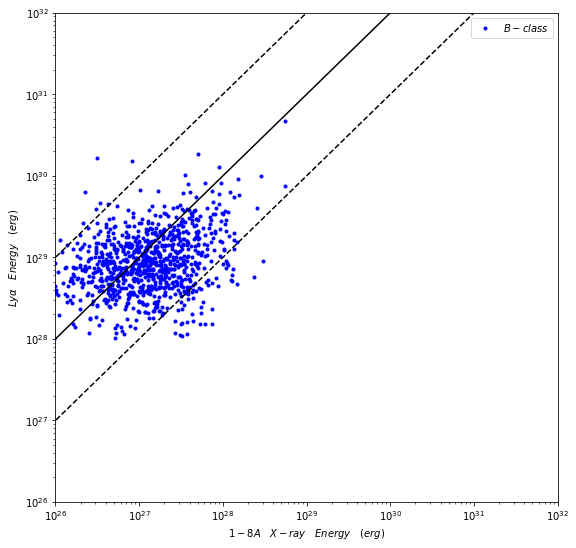

In [8]:
import datetime
import time
import xlrd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
x=sheet4_xrs_energy_1
y=sheet4_lya_energy_1


#x2=[10**(0),10**(7)]
#y2=[10**(0),10**(7)]

x3=[10**(0),10**(6)]
y3=[10**(1),10**(7)]

x4=[10**(0),10**(5)]
y4=[10**(2),10**(7)]

x5=[10**(0),10**(4)]
y5=[10**(3),10**(7)]

#x6=[10**(0),10**(3)]
#y6=[10**(4),10**(7)]


plt.figure(figsize=(9, 9))
#plt.scatter(x, y)

x_new = np.divide(x, 10**(25))  #缩小量级，后续坐标轴重新定义坐标轴
y_new = np.divide(y, 10**(25))  #缩小量级，后续坐标轴重新定义坐标轴


plt.loglog(x_new, y_new,'b.',label=r'$B-class$')
#plt.loglog(x1,y1,'r.',label=r'$C-class$')

#plt.plot(x2,y2,'--',color='black')
plt.plot(x3,y3,'--',color='black')
plt.plot(x4,y4,'-',color='black')
plt.plot(x5,y5,'--',color='black')
#plt.plot(x6,y6,'--',color='black')

plt.ylim(10**(1),10**(7))
plt.xlim(10**(1),10**(7))
#Plot.xlim(10**(5), 10**(6));Plot.ylim(10**(5), 10**(6))

x_ticks = [10**(1),10**(2),10**(3),10**(4),10**(5),10**(6),10**(7)]#用10^0来代替10^25，因为直接显示不了这么大
x_name = [r'$10^{26}$',r'$10^{27}$',r'$10^{28}$',r'$10^{29}$',r'$10^{30}$',r'$10^{31}$',r'$10^{32}$']
plt.xticks(x_ticks,x_name)  #设置坐标刻度

y_ticks = [10**(1),10**(2),10**(3),10**(4),10**(5),10**(6),10**(7)]#用10^0来代替10^25，因为直接显示不了这么大
y_name = [r'$10^{26}$',r'$10^{27}$',r'$10^{28}$',r'$10^{29}$',r'$10^{30}$',r'$10^{31}$',r'$10^{32}$']
plt.yticks(y_ticks,y_name)  #设置坐标刻度


plt.xlabel(r'$1-8{A} \quad X-ray \quad Energy \quad (erg)$')
plt.ylabel(r'$Lyα \quad Energy \quad (erg)$')
plt.legend() #图例
plt.show()

In [9]:
np.savetxt('xrs_C.csv',sheet4_xrs_energy_1, delimiter = ',')
np.savetxt('lya_C.csv',sheet4_lya_energy_1, delimiter = ',')